Customer Segmentation involves grouping customers based on shared characteristics, behaviors and preferences. By segmenting customers, businesses can tailor their strategies and target specific groups more effectively and enhance overall market value. Today we will use Unsupervised Machine Learning to perform Customer Segmentation in Python.

Step 1: Import Libraries

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

Step 2: Load the Dataset

In [117]:
df = pd.read_csv(r'/content/Customer_segmentations_data(PJ).csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [118]:
df.shape

(2240, 29)

Step 3: Data Preprocessing

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [121]:
# check the null values in the dataset

for col in df.columns:
  temp = df[col].isnull().sum()
  if temp > 0:
    print(col,temp)

Income 24


In [122]:
# Now, once we have the count of the null values and we know the values are very less we can drop them as it will not affect the dataset much.

In [123]:
df = df.dropna()
print('Total values in the DATASET after removing null values', len(df))

Total values in the DATASET after removing null values 2216


In [124]:
#To find the total number of unique values in each column

df.nunique()

,0
ID,2216
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,662
Recency,100
MntWines,776


In [125]:
# we can observe that there are columns which contain single values in the whole column so, they have no relevance in the model development.

# Also dataset has a column Dt_Customer which contains the date column, we can convert into 3 columns i.e. day, month, year.

In [126]:
parts = df['Dt_Customer'].str.split('-',n = 3, expand = True)
df['Day'] = parts[0].astype(int)
df['Month'] = parts[1].astype(int)
df['Year'] = parts[2].astype(int)

In [127]:
#Now we have all the important features, we can now drop features like Z_CostContact, Z_Revenue, Dt_Customer.

In [128]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],axis = 1, inplace = True)


Step 4: Data Visualization and Analysis

In [129]:
floats, objects = [],[]
for col in df.columns:
  if df[col].dtype =='object':
    objects.append(col)
  elif df[col].dtype == 'float':
    floats.append(col)

print(floats)
print(objects)

['Income']
['Education', 'Marital_Status']


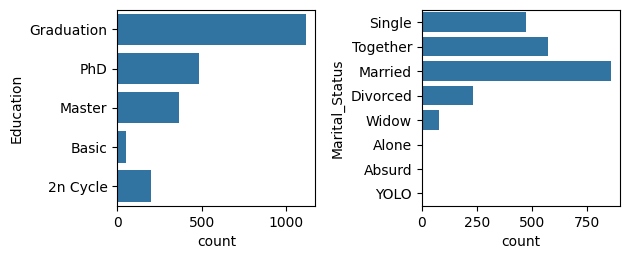

In [130]:
  #To get the count plot for the columns of the datatype - object


  for  i, col in enumerate(objects):
    plt.subplot(2,2,i + 1)
    sns.countplot(df[col])

  plt.tight_layout()
  plt.show()

In [131]:
  # Let's check the value_counts of the Marital_Status of the data.

  df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [132]:
# Now lets see the comparison of the features with respect to the values of the responses.

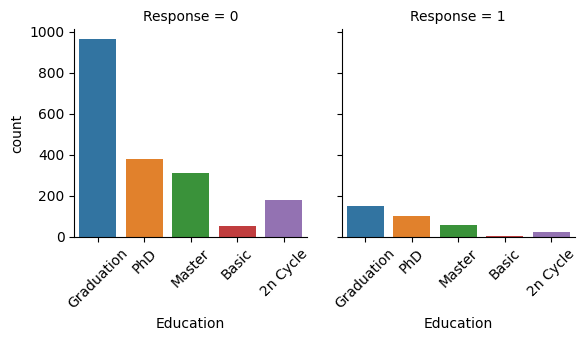

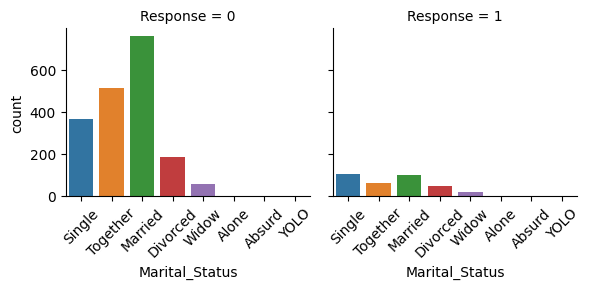

In [133]:
for i, col in enumerate(objects):
  mp = sns.FacetGrid(df,col = 'Response',hue =col )
  mp.map(sns.countplot,col)
  for ax in mp.axes.flat:
            ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [134]:
# Label Encoding

for col in df.columns:
  if df[col].dtype == 'object':
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

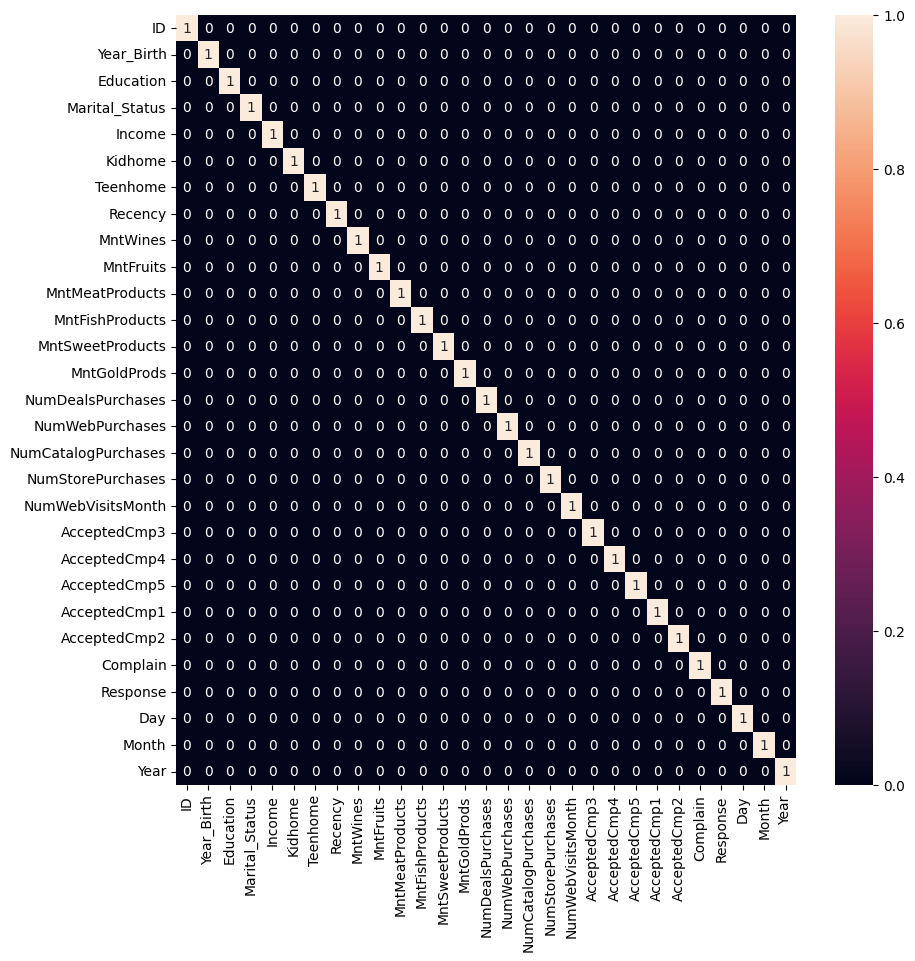

In [135]:
# visualize the correlation among the different features
plt.figure(figsize = (10,10))
sns.heatmap(df.corr() > 0.8, annot = True)
plt.show()

In [136]:
# Standardization

scaler  = StandardScaler()
data = scaler.fit_transform(df)

Step 5: Segmentation

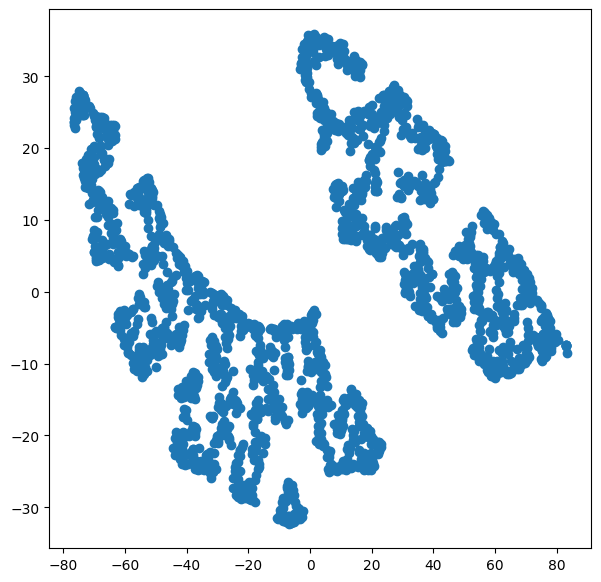

In [137]:
from sklearn.manifold import TSNE
model = TSNE(n_components = 2, random_state = 0,perplexity=30)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7,7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

There are certainly some clusters which are clearly visual from the 2-D representation of the given data. KMeans Clustering can also be used to cluster the different points in a plane.

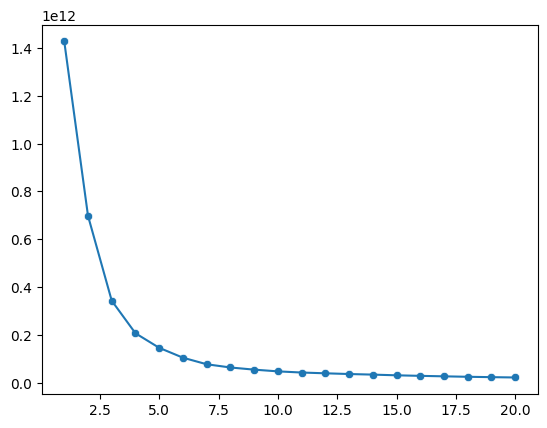

In [138]:
# Elbow Method for finding optimal number of clusters

error=[]
for n_clusters in range(1,21):
  model = KMeans(init = 'k-means++', n_clusters = n_clusters, max_iter = 500, random_state = 22, n_init=12)
  model.fit(df)
  error.append(model.inertia_)

sns.lineplot(x = range(1,21), y = error)
sns.scatterplot(x = range(1,21), y = error)
plt.show()

In [139]:
error

[1427382308517.0713,
 697963649717.083,
 342743863971.53503,
 206525936236.00067,
 145665427153.48114,
 104381380044.44981,
 76882758400.48187,
 63372380452.624725,
 54370899232.09844,
 47129682196.865295,
 42250360820.34732,
 39050626162.27199,
 36009098924.53029,
 33537579716.5241,
 30630802147.994465,
 28360653535.889713,
 26370354438.24159,
 24448734437.365993,
 22913353022.009666,
 21565188855.032364]

Here by using the elbow method we can say that k = 6 is the optimal number of clusters that should be made as after k = 3 the value of the inertia is not decreasing drastically.

In [140]:
model = KMeans(init='k-means++',n_clusters=6,max_iter=500,random_state=22)
segments = model.fit_predict(df)

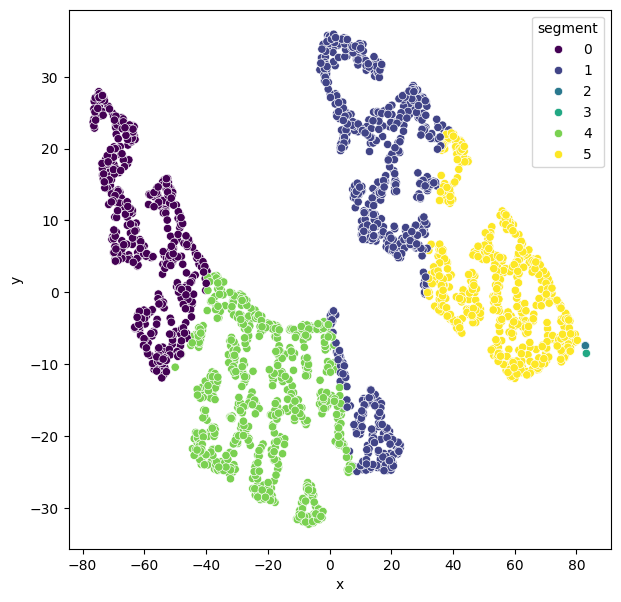

In [141]:
plt.figure(figsize = (7,7))
df_tsne = pd.DataFrame({'x' : tsne_data[:,0], 'y' : tsne_data[:,1], 'segment' : segments})
sns.scatterplot(x = 'x', y = 'y', hue = 'segment', data = df_tsne,palette='viridis' )
plt.show()